In [1]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import cv2
from pathlib import Path

DATASETS_DIR = "./Datasets/Foods/"

classnames = []

for path in Path(DATASETS_DIR).iterdir():
    if path.is_dir():
        classnames.append(str(path).split("/")[-1])

print(classnames)

['Hu tieu', 'Bun thit nuong', 'Banh can', 'Banh duc', 'Xoi xeo', 'Banh beo', 'Banh cuon', 'Cao lau', 'Banh xeo', 'Bun mam', 'Banh khot', 'Ca kho to', 'Mi quang', 'Banh trang nuong', 'Canh chua', 'Pho', 'Com tam', 'Goi cuon', 'Banh tet', 'Bun dau mam tom', 'Banh mi', 'Banh canh', 'Banh pia', 'Chao long', 'Banh gio', 'Banh bot loc', 'Banh chung', 'Bun bo Hue', 'Bun rieu', 'Nem chua']


In [2]:
X = []
y = []

for i in range(len(classnames)):
    print(classnames[i])
    images = list(Path(DATASETS_DIR + classnames[i]).glob("*"))
    for image in range(int(0.4 * len(images))):
        img = cv2.imread(str(images[image]))
        img = cv2.resize(img, (128, 128))
        img = img.astype("float32")
        img = img / 255
        X.append(img)
        y.append(i)

Hu tieu
Bun thit nuong
Banh can
Banh duc
Xoi xeo
Banh beo
Banh cuon


libpng warning: iCCP: known incorrect sRGB profile


Cao lau
Banh xeo
Bun mam
Banh khot
Ca kho to
Mi quang
Banh trang nuong
Canh chua
Pho
Com tam
Goi cuon


libpng warning: iCCP: known incorrect sRGB profile


Banh tet
Bun dau mam tom
Banh mi
Banh canh
Banh pia
Chao long
Banh gio
Banh bot loc
Banh chung
Bun bo Hue
Bun rieu
Nem chua


Corrupt JPEG data: 9 extraneous bytes before marker 0xe2


In [3]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=0.2)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

2023-04-21 13:54:32.142818: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-21 13:54:32.252722: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-21 13:54:32.253499: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-21 13:54:33.598017: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


(5617, 128, 128, 3)
(1405, 128, 128, 3)
(5617, 30)
(1405, 30)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


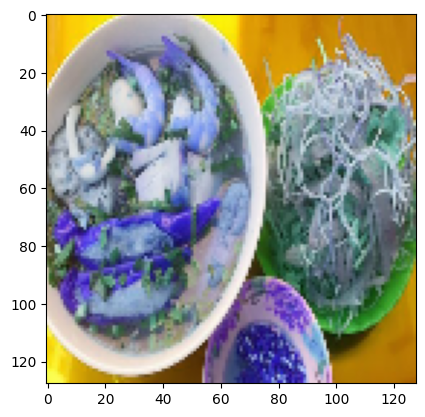

In [4]:
plt.imshow(X_train[2])
print(y_train[2])

In [5]:
from keras.models import Sequential, Model
from keras import layers
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5, 5), padding="same",
                 activation="relu", input_shape=X_train[0].shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=96, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=96, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dense(y_train.shape[1], activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])
model.summary()

history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

2023-04-21 13:54:36.682061: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-21 13:54:36.683263: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 96)       0

2023-04-21 13:54:37.104314: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1104347136 exceeds 10% of free system memory.


176/176 [==============================] - 161s 903ms/step - loss: 3.2831 - accuracy: 0.0823
Epoch 2/50
176/176 [==============================] - 157s 891ms/step - loss: 3.0370 - accuracy: 0.1497
Epoch 3/50
176/176 [==============================] - 157s 890ms/step - loss: 2.6841 - accuracy: 0.2373
Epoch 4/50
176/176 [==============================] - 156s 884ms/step - loss: 2.2510 - accuracy: 0.3488
Epoch 5/50
176/176 [==============================] - 156s 884ms/step - loss: 1.5794 - accuracy: 0.5339
Epoch 6/50
176/176 [==============================] - 153s 872ms/step - loss: 0.7029 - accuracy: 0.7905
Epoch 7/50
176/176 [==============================] - 152s 865ms/step - loss: 0.2296 - accuracy: 0.9338
Epoch 8/50
176/176 [==============================] - 153s 870ms/step - loss: 0.1125 - accuracy: 0.9658
Epoch 9/50
176/176 [==============================] - 152s 861ms/step - loss: 0.1001 - accuracy: 0.9763
Epoch 10/50
176/176 [==============================] - 153s 867ms/step - lo

In [8]:
model.evaluate(X_train, y_train)

2023-04-21 16:21:30.410870: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1104347136 exceeds 10% of free system memory.


176/176 [==============================] - 41s 232ms/step - loss: 2.8330e-04 - accuracy: 0.9998


[0.00028329851920716465, 0.9998219609260559]

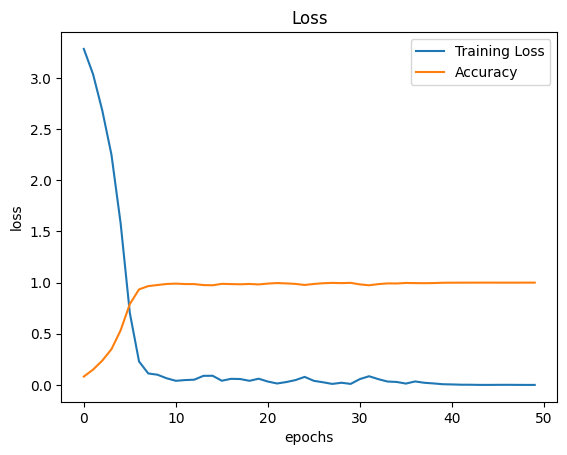

In [7]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["accuracy"], label="Accuracy")
plt.title("Loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

(128, 128, 3)
1/1 [==============================] - 0s 82ms/step
Predict: Goi cuon
True Label: Goi cuon


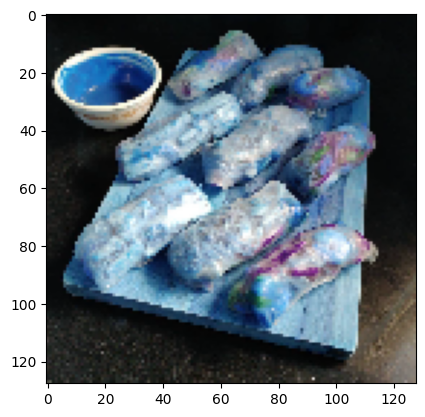

In [11]:
n = 0
print(X_test[n].shape)
plt.imshow(X_test[n])
predict = model.predict(X_test[n].reshape(1, 128, 128, 3))
print("Predict:", classnames[predict.argmax()])
print("True Label:", classnames[y_test[n].argmax()])

(128, 128, 3)
1/1 [==============================] - 0s 55ms/step
Predict: Bun rieu
True Label: Bun rieu


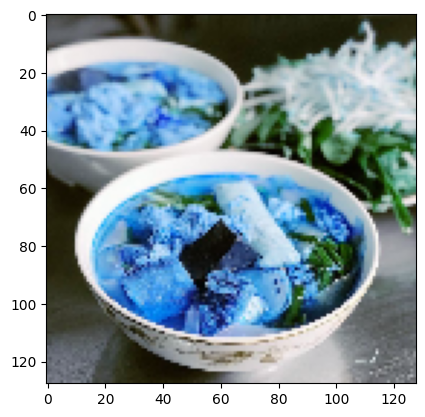

In [15]:
n += 1
print(X_test[n].shape)
plt.imshow(X_test[n])
predict = model.predict(X_test[n].reshape(1, 128, 128, 3))
print("Predict:", classnames[predict.argmax()])
print("True Label:", classnames[y_test[n].argmax()])

(128, 128, 3)
1/1 [==============================] - 0s 55ms/step
Predict: Banh canh
True Label: Banh canh


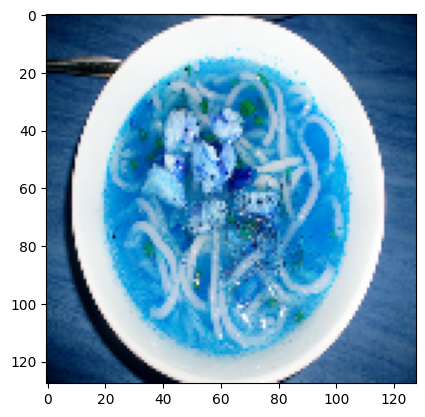

In [23]:
n += 1
print(X_test[n].shape)
plt.imshow(X_test[n])
predict = model.predict(X_test[n].reshape(1, 128, 128, 3))
print("Predict:", classnames[predict.argmax()])
print("True Label:", classnames[y_test[n].argmax()])